In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_xmin import ds2s_OV_xmin
from lib.funcs import *

In [2]:
x_min = 0.1  # 車両の長さ: 4.7mで換算

L = 10.0  # レーンの長さ: 470m
n_0 = 5

x_0 = ((4.7+3.0)/4.7) * x_min  # 最小車間距離: 車両の長さ+3mで換算
v_0 = (1000/36)/4.7 * x_min  # 車両の最高速度: 法定速度100km/hで換算
dt = 1.0  # 時間差分1秒
dx = 0.1  # テキトー。基本図がいい感じになるように調整

In [3]:
data = {}
for id, K in enumerate(range(101)):
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		x_min=x_min,
		dt=dt,
		dx=dx,
		x_init=np.array([L/K * i for i in range(K)], dtype=np.float64),
		n_max=10010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = {
		label: flow
			for label, flow in [(
					"{} {}".format(1000*i, 1000*i+100),
	 				model.flow(1000*i, 1000*i+100)
				) for i in range(10)]
	}
	js["flow"]["50 100"] = model.flow(50, 100)
	data[id] = js

In [4]:
# xminで初期化
for id, K in zip(range(101, 201), range(101)):
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		x_min=x_min,
		dt=dt,
		dx=dx,
		x_init=np.array([x_min * i for i in range(K)], dtype=np.float64),
		n_max=10010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = {
		label: flow
			for label, flow in [(
					"{} {}".format(1000*i, 1000*i+100),
	 				model.flow(1000*i, 1000*i+100)
				) for i in range(10)]
	}
	js["flow"]["50 100"] = model.flow(50, 100)
	data[id] = js

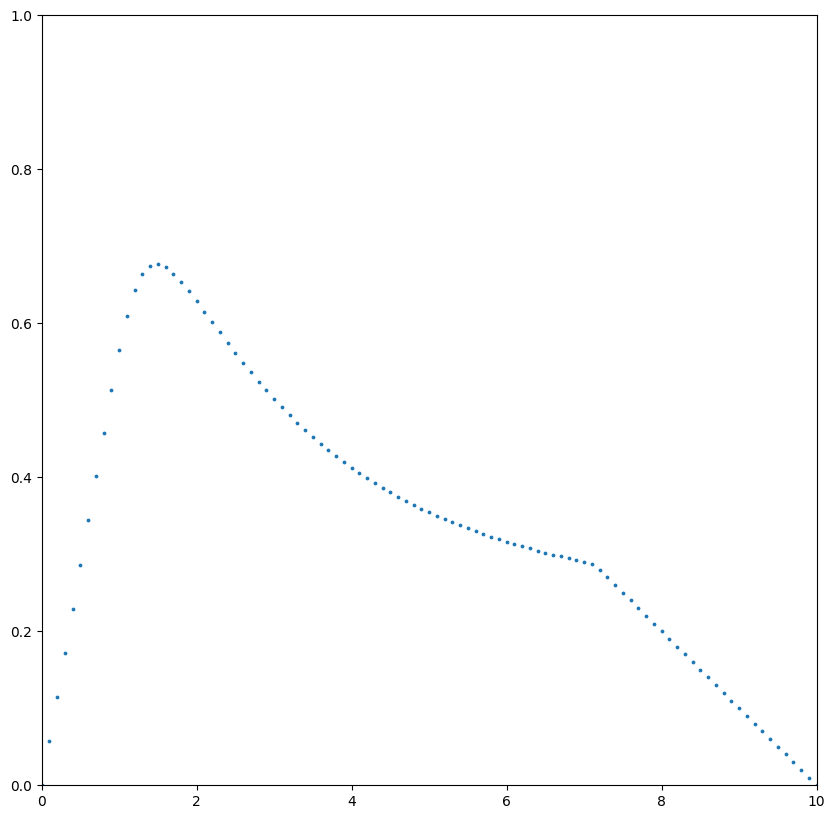

In [5]:
density = [data[id]["density"] for id in range(101)]
flow = [data[id]["flow"]["50 100"] for id in range(101)]
plt.figure(figsize=(10, 10))
plt.xlim(0, 10.0)
plt.ylim(0, 1.0)
plt.scatter(density, flow, s=3)

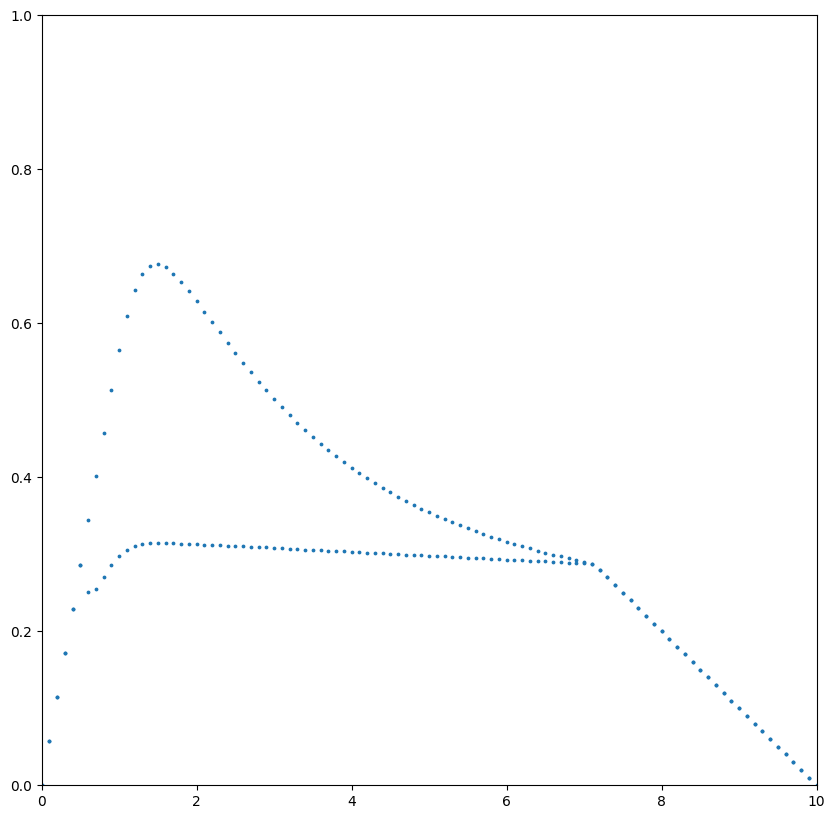

In [6]:
density += [data[id]["density"] for id in range(101, 201)]
flow += [data[id]["flow"]["1000 1100"] for id in range(101, 201)]
plt.figure(figsize=(10, 10))
plt.xlim(0, 10.0)
plt.ylim(0, 1.0)
plt.scatter(density, flow, s=3)

In [7]:
# xminで初期化
for id, K in zip(range(201, 301), range(51)):
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		x_min=x_min,
		dt=dt,
		dx=dx,
		x_init=np.array([2 * x_min * i for i in range(K)], dtype=np.float64),
		n_max=10010,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = {
		label: flow
			for label, flow in [(
					"{} {}".format(1000*i, 1000*i+100),
	 				model.flow(1000*i, 1000*i+100)
				) for i in range(10)]
	}
	js["flow"]["50 100"] = model.flow(50, 100)
	data[id] = js

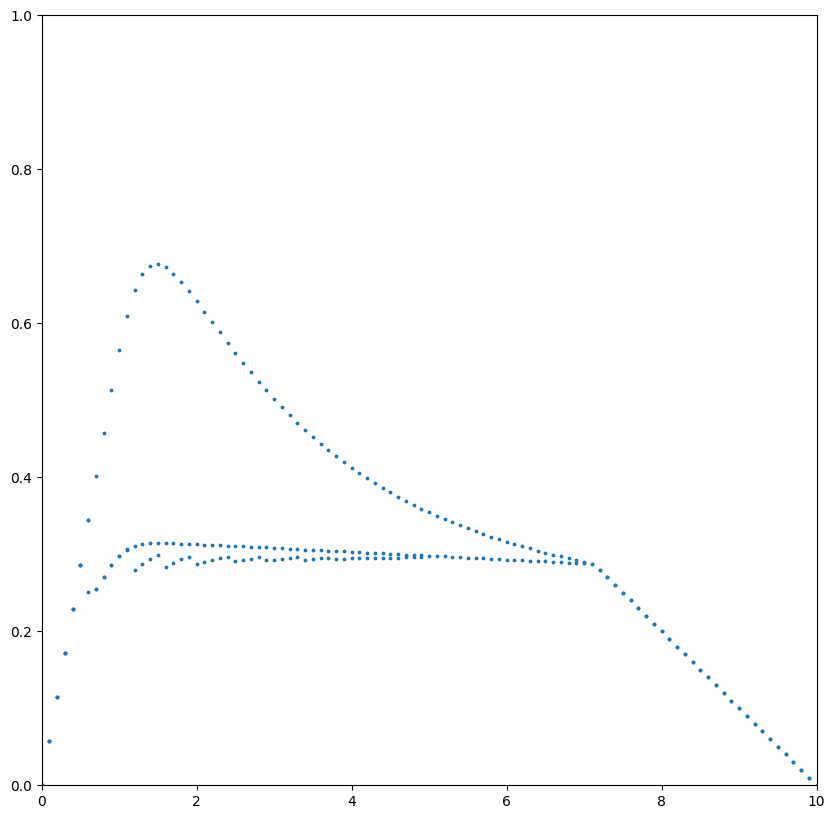

In [8]:
density += [data[id]["density"] for id in range(201, 251)]
flow += [data[id]["flow"]["1000 1100"] for id in range(201, 251)]
plt.figure(figsize=(10, 10))
plt.xlim(0, 10.0)
plt.ylim(0, 1.0)
plt.scatter(density, flow, s=3)